### PART A

In [45]:
def merge(A, B, dim):
    if not A:
        return B
    if not B:
        return A

    if A[0][dim] <= B[0][dim]:
        return [A[0]] + merge(A[1:], B, dim)
    else:
        return [B[0]] + merge(A, B[1:], dim)
    
def mergesort(A, dim=0):
    if len(A) > 1:
        mid = len(A) // 2
        left = mergesort(A[:mid], dim)
        right = mergesort(A[mid:], dim)
        return merge(left, right, dim)
    else:
        return A

tuples = [(1,0),(5,13),(1351,14),(25,78), (6,20),(4,2)]

print(f"x-axis:  {mergesort(tuples, 0)}")
print(f"y-axis:  {mergesort(tuples, 1)}")


x-axis:  [(1, 0), (4, 2), (5, 13), (6, 20), (25, 78), (1351, 14)]
y-axis:  [(1, 0), (4, 2), (5, 13), (1351, 14), (6, 20), (25, 78)]


### PART B

In [46]:
import random

def generate_pairs(n, x_range, y_range):
    pairs = set()
    while len(pairs) < n:
        pairs.add((random.randint(*x_range), random.randint(*y_range)))
    return list(pairs)

# for grader example:
# generating 10 pairs of x and y values ranging from 0-50
test_pairs = generate_pairs(10, [0,50],[0,50])
print(test_pairs)

[(46, 20), (26, 46), (10, 14), (33, 35), (33, 19), (22, 35), (1, 29), (35, 34), (30, 34), (37, 36)]


### PART C

In [47]:
import math

def dist(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

pair = generate_pairs(1, [0,20], [0,20])[0]
print(pair)
pair2 = generate_pairs(1, [0,20], [0,20])[0]
print(pair2)
print("My dist:", dist(pair, pair2))
print("Built-in math lib dist:", math.dist(pair, pair2))

(9, 20)
(16, 4)
My dist: 17.46424919657298
Built-in math lib dist: 17.46424919657298


### PART D/E
Used some google for help (closest distance query)

In [49]:
def closest_points(points):
    def closest_in_strip(strip, min_dist):
        for i in range(len(strip) - 1):
            for j in range(i + 1, len(strip)):
                if strip[j][1] < strip[i][1]:
                    strip[i], strip[j] = strip[j], strip[i]

        min_d = min_dist
        closest_pair = None
        for i in range(len(strip)):
            j = i + 1
            while j < len(strip) and (strip[j][1] - strip[i][1] < min_d):
                d = dist(strip[i], strip[j])
                if d < min_d:
                    min_d = d
                    closest_pair = (strip[i], strip[j])
                j += 1
        return min_d, closest_pair

    def closest_pair_rec(points_sorted_by_x):
        n = len(points_sorted_by_x)
        if n <= 3:
            return brute_force_closest_points(points_sorted_by_x)
        
        mid = n // 2
        mid_point = points_sorted_by_x[mid]
        left_half = points_sorted_by_x[:mid]
        right_half = points_sorted_by_x[mid:]
        
        left_min_dist, left_min_pair = closest_pair_rec(left_half)
        right_min_dist, right_min_pair = closest_pair_rec(right_half)
        
        min_dist = min(left_min_dist, right_min_dist)
        if left_min_dist <= right_min_dist:
            min_pair = left_min_pair
        else:
            min_pair = right_min_pair
        
        strip = [p for p in points_sorted_by_x if abs(p[0] - mid_point[0]) < min_dist]
        strip_min_dist, strip_min_pair = closest_in_strip(strip, min_dist)
        if strip_min_dist < min_dist:
            return strip_min_dist, strip_min_pair
        
        return min_dist, min_pair

    points_sorted_by_x = mergesort(points, dim=0)
    return closest_pair_rec(points_sorted_by_x)


def brute_force_closest_points(A):
    min_dist = float('inf')
    closest_pair = None
    for i in range(len(A)):
        for j in range(i + 1, len(A)):
            d = dist(A[i], A[j])
            if d < min_dist:
                min_dist = d
                closest_pair = (A[i], A[j])
    return min_dist, closest_pair

points = [(1, 1), (4, 4)]
print("Distance between (1, 1) and (4, 4)")
print("Divide and Conquer:", closest_points(points))
print("Brute Force:", brute_force_closest_points(points))

print()
points = [(random.randint(1, 100), random.randint(1, 100)) for _ in range(100)]
print("Random larger set")
print("Divide and Conquer:", closest_points(points))
print("Brute Force:", brute_force_closest_points(points))

Distance between (1, 1) and (4, 4)
Divide and Conquer: (4.242640687119285, ((1, 1), (4, 4)))
Brute Force: (4.242640687119285, ((1, 1), (4, 4)))

Random larger set
Divide and Conquer: (1.4142135623730951, ((11, 70), (12, 71)))
Brute Force: (1.4142135623730951, ((32, 80), (31, 81)))


### PART F

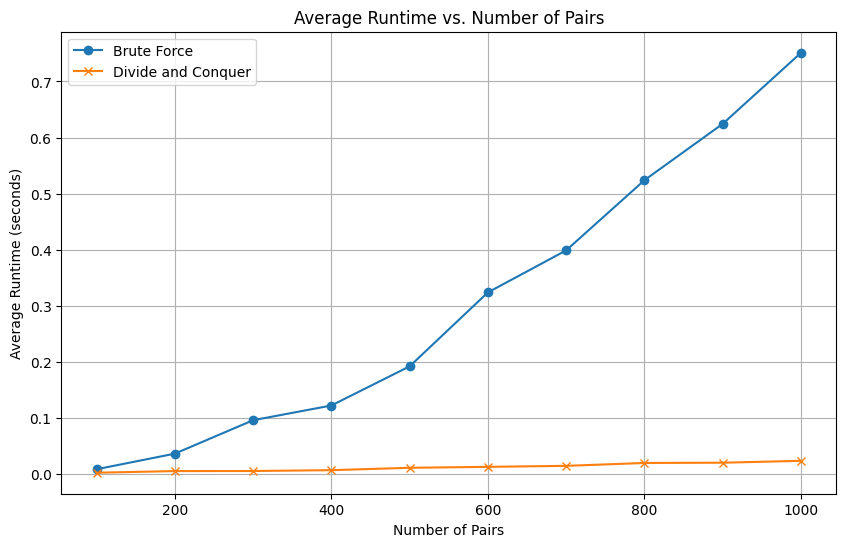

In [50]:
from time import perf_counter
import matplotlib.pyplot as plt

def compare_methods(max, step):
    pair_counts = list(range(step, max + 1, step))
    avg_times_static = []
    avg_times_dynamic = []

    for count in pair_counts:
        pairs = generate_pairs(count, (0, 100), (0, 100))
        
        start_time = perf_counter()
        brute_force_closest_points(pairs)
        end_time = perf_counter()
        avg_times_static.append(end_time - start_time)
        
        start_time = perf_counter()
        closest_points(pairs)
        end_time = perf_counter()
        avg_times_dynamic.append(end_time - start_time)
    
    return pair_counts, avg_times_static, avg_times_dynamic

def plot_runtimes(pair_counts, avg_times_static, avg_times_dynamic):
    plt.figure(figsize=(10, 6))
    plt.plot(pair_counts, avg_times_static, label='Brute Force', marker='o')
    plt.plot(pair_counts, avg_times_dynamic, label='Divide and Conquer', marker='x')
    plt.xlabel('Number of Pairs')
    plt.ylabel('Average Runtime (seconds)')
    plt.title('Average Runtime vs. Number of Pairs')
    plt.legend()
    plt.grid(True)
    plt.show()

max_pairs = 1000  
step = 100  

pair_counts, avg_times_static, avg_times_dynamic = compare_methods(max_pairs, step)
plot_runtimes(pair_counts, avg_times_static, avg_times_dynamic)

### PART G

In [ ]:
def visualize_points(points):
    x = [point[0] for point in points]
    y = [point[1] for point in points]

    _, closest_pair = 
    closest_xs = [closest_pair[0][0], closest_pair[1][0]]
    closest_ys = [closest_pair[0][1], closest_pair[1][1]]
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label='Points')  # Scatter plot of all points
    plt.scatter(closest_xs, closest_ys, color='red', s=100, edgecolors='black', label='Closest Pair')  # Highlight closest pair
    plt.plot(closest_xs, closest_ys, color='green', linestyle='--', linewidth=2, markersize=15, label='Line Segment')  # Line segment between closest pair

    # Adding labels and legend
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')
    plt.title('Scatter Plot with Closest Pair Highlighted')
    plt.legend()
    plt.grid(True)
    plt.show()


